In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
HPI = pd.read_csv('HPI_Master copy.csv')
print(HPI.head())
print(HPI.dtypes)

      hpi_type     hpi_flavor frequency                   level  \
0  traditional  purchase-only   monthly  USA or Census Division   
1  traditional  purchase-only   monthly  USA or Census Division   
2  traditional  purchase-only   monthly  USA or Census Division   
3  traditional  purchase-only   monthly  USA or Census Division   
4  traditional  purchase-only   monthly  USA or Census Division   

                    place_name place_id    yr  period  index_nsa  index_sa  
0  East North Central Division   DV_ENC  1991       1     100.00    100.00  
1  East North Central Division   DV_ENC  1991       2     101.03    101.11  
2  East North Central Division   DV_ENC  1991       3     101.40    101.08  
3  East North Central Division   DV_ENC  1991       4     101.79    101.10  
4  East North Central Division   DV_ENC  1991       5     102.44    101.50  
hpi_type       object
hpi_flavor     object
frequency      object
level          object
place_name     object
place_id       object
yr 

In [3]:
home_prices = HPI['index_nsa']
years = HPI.yr.unique()
years =sorted(years)
print(years)

[1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]


In [4]:
price_list = []
for i in years:
    yearly_ave = HPI.index_nsa[HPI.yr == i].mean()
    price_list.append(yearly_ave)

price_list = np.array(price_list)
print(price_list)

[ 59.02445255  55.10761273  55.64607843  59.78546805  66.045325
  69.87161327  73.87569124  76.59486887  77.78246216  79.59454461
  82.08175214  85.55146034  88.72620644  91.90738938  95.69323077
  98.54563025 100.72984095 103.35228647 106.1026743  109.72745949
 112.67046271 116.52672141 120.16704953 125.84270328 131.85528216
 139.60465878 149.28166768 158.70015133 169.46753329 185.97167978
 208.18716404 223.54067797 224.84524213 210.66073245 198.47684625
 191.45886501 184.54934927 186.58990315 195.57600182 204.92682809
 215.7715345  223.90117823]


In [5]:
level_unique = HPI.level.unique()
print(level_unique)
states = HPI.place_name[HPI.level == 'State'].unique()
states = np.array(states)

['USA or Census Division' 'MSA' 'State' 'Puerto Rico']


In [6]:
houseprice_ave = []
year_of_ave = []
state_name = []

for i in sorted(HPI.place_id.unique()):
    for j in sorted(HPI.yr.unique()):
        ave_price = HPI.index_nsa[HPI.level =='State'][HPI.place_id == i][HPI.yr ==j].mean()
        houseprice_ave.append(ave_price)
        year_of_ave.append(j)
        state_name.append(i)


In [12]:
df = pd.DataFrame([houseprice_ave, year_of_ave,state_name]).T
df.columns = ['price', 'year','state']
df.to_csv('C:/Users/kojis/US housing marketHouse Price List.csv')

In [13]:
df = pd.read_csv('House Price List.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19488 entries, 0 to 19487
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  19488 non-null  int64  
 1   price       2142 non-null   float64
 2   year        19488 non-null  int64  
 3   state       19488 non-null  object 
dtypes: float64(1), int64(2), object(1)
memory usage: 609.1+ KB


In [14]:
df['price'].replace('', np.nan, inplace = True)
df.dropna(subset = ['price'], inplace = True)
table = df.pivot(index = 'state', columns = 'year', values = 'price')
print(table)

year      1975     1976     1977     1978      1979      1980      1981  \
state                                                                     
AK     64.5450  71.1825  77.8075  84.3500   94.5375   85.9975  110.5275   
AL     72.0375  77.0875  85.2775  92.7550  102.3950  104.9550  108.5450   
AR     63.7325  70.0175  77.3000  84.0350   97.4050  104.1475  107.3900   
AZ     58.5850  60.8150  65.6775  76.9475   93.9325  103.6275  112.1950   
CA     43.6250  51.7575  64.8750  77.3150   90.7000  104.4850  114.5575   
CO     54.4600  58.9700  68.1275  82.2075   96.0600  103.9975  111.2425   
CT     62.2100  66.0275  69.3100  82.3375   99.1525  102.8975  110.5700   
DC     48.5525  54.8500  65.2400  76.4775   91.9175   99.1725  100.2275   
DE     89.6475  83.3175  81.6875  85.7375   91.2475  106.5525  109.4275   
FL     71.6775  71.4350  74.8900  82.9125   93.5775  103.7750  111.7575   
GA     73.5250  75.6750  77.4875  84.2825   91.5900  101.2200  109.0000   
HI     55.3925  55.1850  

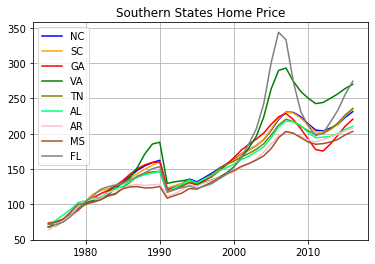

In [15]:
#plt.figure(figsize = (6,4))
#plt.subplot(2,3,1)
plt.plot(df.year[df.state == 'NC'], df.price[df.state == 'NC'],color='blue')
plt.plot(df.year[df.state == 'SC'], df.price[df.state == 'SC'],color ='orange')
plt.plot(df.year[df.state == 'GA'], df.price[df.state == 'GA'],color ='r')
plt.plot(df.year[df.state == 'VA'], df.price[df.state == 'VA'],color ='g')
plt.plot(df.year[df.state == 'TN'], df.price[df.state == 'TN'],color ='olive')
plt.plot(df.year[df.state == 'AL'], df.price[df.state == 'AL'],color ='springgreen')
plt.plot(df.year[df.state == 'AR'], df.price[df.state == 'AR'],color ='pink')
plt.plot(df.year[df.state == 'MS'], df.price[df.state == 'MS'],color ='sienna')
plt.plot(df.year[df.state == 'FL'], df.price[df.state == 'FL'],color ='gray')

plt.grid()
plt.legend(['NC','SC','GA','VA','TN','AL','AR','MS','FL'])
plt.title('Southern States Home Price')

savedirectory = 'C:/Users/kojis/Desktop/work/US homeprice/'
plt.savefig(savedirectory + 'SouthernStatesHomePrice.png')

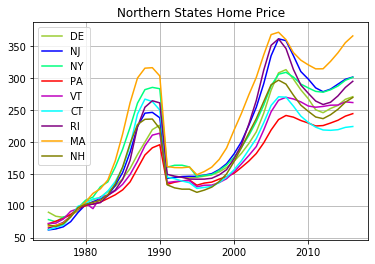

In [16]:
#plt.subplot(2,3,2)
plt.plot(df.year[df.state == 'DE'], df.price[df.state == 'DE'],color='yellowgreen')
plt.plot(df.year[df.state == 'NJ'], df.price[df.state == 'NJ'],color='b')
plt.plot(df.year[df.state == 'NY'], df.price[df.state == 'NY'],color='springgreen')
plt.plot(df.year[df.state == 'PA'], df.price[df.state == 'PA'],color='red')
plt.plot(df.year[df.state == 'VT'], df.price[df.state == 'VT'],color='m')
plt.plot(df.year[df.state == 'CT'], df.price[df.state == 'CT'],color='cyan')
plt.plot(df.year[df.state == 'RI'], df.price[df.state == 'RI'],color='purple')
plt.plot(df.year[df.state == 'MA'], df.price[df.state == 'MA'],color='orange')
plt.plot(df.year[df.state == 'NH'], df.price[df.state == 'NH'],color='olive')

plt.grid()
plt.legend(['DE','NJ','NY','PA','VT','CT','RI','MA','NH'])
plt.title('Northern States Home Price')
savedirectory = 'C:/Users/kojis/Desktop/work/US homeprice/'
plt.savefig(savedirectory + 'NothernStatesHomePrice.png')

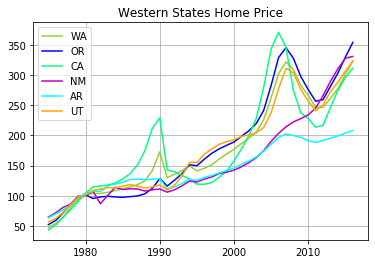

In [17]:
#plt.subplot(2,3,3)
plt.plot(df.year[df.state == 'WA'], df.price[df.state == 'WA'],color='yellowgreen')
plt.plot(df.year[df.state == 'OR'], df.price[df.state == 'OR'],color='b')
plt.plot(df.year[df.state == 'CA'], df.price[df.state == 'CA'],color='springgreen')
plt.plot(df.year[df.state == 'ND'], df.price[df.state == 'ND'],color='m')
plt.plot(df.year[df.state == 'AR'], df.price[df.state == 'AR'],color='cyan')
plt.plot(df.year[df.state == 'UT'], df.price[df.state == 'UT'],color='orange')

plt.legend(['WA','OR','CA','NM','AR','UT'])
plt.title('Western States Home Price')
plt.grid()
savedirectory = 'C:/Users/kojis/Desktop/work/US homeprice/'
plt.savefig(savedirectory + 'WesternStatesHomePrice.png')

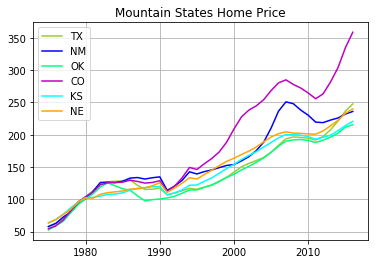

In [18]:
#plt.subplot(2,3,4)
plt.plot(df.year[df.state == 'TX'], df.price[df.state == 'TX'],color='yellowgreen')
plt.plot(df.year[df.state == 'NM'], df.price[df.state == 'NM'],color='b')
plt.plot(df.year[df.state == 'OK'], df.price[df.state == 'OK'],color='springgreen')
plt.plot(df.year[df.state == 'CO'], df.price[df.state == 'CO'],color='m')
plt.plot(df.year[df.state == 'KS'], df.price[df.state == 'KS'],color='cyan')
plt.plot(df.year[df.state == 'NE'], df.price[df.state == 'NE'],color='orange')

plt.legend(['TX','NM','OK','CO','KS','NE'])
plt.title('Mountain States Home Price')
plt.grid()
savedirectory = 'C:/Users/kojis/Desktop/work/US homeprice/'
plt.savefig(savedirectory + 'MountainStatesHomePrice.png')

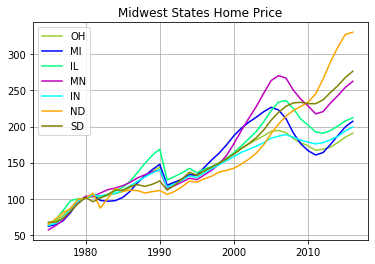

In [19]:
#plt.subplot(2,3,5)
plt.plot(df.year[df.state == 'OH'], df.price[df.state == 'OH'],color='yellowgreen')
plt.plot(df.year[df.state == 'MI'], df.price[df.state == 'MI'],color='b')
plt.plot(df.year[df.state == 'IL'], df.price[df.state == 'IL'],color='springgreen')
plt.plot(df.year[df.state == 'MN'], df.price[df.state == 'MN'],color='m')
plt.plot(df.year[df.state == 'IN'], df.price[df.state == 'IN'],color='cyan')
plt.plot(df.year[df.state == 'ND'], df.price[df.state == 'ND'],color='orange')
plt.plot(df.year[df.state == 'SD'], df.price[df.state == 'SD'],color='olive')

plt.legend(['OH','MI','IL','MN','IN','ND','SD'])
plt.title('Midwest States Home Price')
plt.grid()
savedirectory = 'C:/Users/kojis/Desktop/work/US homeprice/'
plt.savefig(savedirectory + 'MidwestStatesHomePrice.png')

In [21]:
# import the folium library
import folium

# initialize the map and store it in a m object
m = folium.Map(location=[40, -95], zoom_start=4)

# show the map
m

import pandas as pd

url = (
    "https://raw.githubusercontent.com/python-visualization/folium/master/examples/data")
state_geo = f"{url}/us-states.json"
#state_unemployment = f"{url}/US_Unemployment_Oct2012.csv"

#state_data = pd.read_csv(state_unemployment)
state_data = pd.read_csv('House Price List.csv')
year_data = state_data[state_data.year==1975]

folium.Choropleth(
    geo_data=state_geo,
    name="choropleth",
    data=year_data,
    columns=["state", "price", "year"],
    key_on="feature.id",
    fill_color="YlGn",
    fill_opacity=0.7,
    line_opacity=.1,
    legend_name="Home Price ($K)",
).add_to(m)

folium.LayerControl().add_to(m)
savedirectory = 'C:/Users/kojis/US housing market/'
plt.savefig(savedirectory + 'House price in 1975.png')

m

<Figure size 432x288 with 0 Axes>

In [22]:
m = folium.Map(location=[40, -95], zoom_start=4)

# show the map
m

import pandas as pd

url = (
    "https://raw.githubusercontent.com/python-visualization/folium/master/examples/data")
state_geo = f"{url}/us-states.json"
#state_unemployment = f"{url}/US_Unemployment_Oct2012.csv"

#state_data = pd.read_csv(state_unemployment)
state_data = pd.read_csv('House Price List.csv')
year_data = state_data[state_data.year==1976]

folium.Choropleth(
    geo_data=state_geo,
    name="choropleth",
    data=year_data,
    columns=["state", "price", "year"],
    key_on="feature.id",
    fill_color="YlGn",
    fill_opacity=0.7,
    line_opacity=.1,
    legend_name="Home Price ($K)",
).add_to(m)

folium.LayerControl().add_to(m)
savedirectory = 'C:/Users/kojis/US housing market/'
plt.savefig(savedirectory + 'House price in 1976.png')

m

<Figure size 432x288 with 0 Axes>

In [23]:
m = folium.Map(location=[40, -95], zoom_start=4)

# show the map
m

import pandas as pd

url = (
    "https://raw.githubusercontent.com/python-visualization/folium/master/examples/data")
state_geo = f"{url}/us-states.json"
#state_unemployment = f"{url}/US_Unemployment_Oct2012.csv"

#state_data = pd.read_csv(state_unemployment)
state_data = pd.read_csv('House Price List.csv')
year_data = state_data[state_data.year==1977]

folium.Choropleth(
    geo_data=state_geo,
    name="choropleth",
    data=year_data,
    columns=["state", "price", "year"],
    key_on="feature.id",
    fill_color="YlGn",
    fill_opacity=0.7,
    line_opacity=.1,
    legend_name="Home Price ($K)",
).add_to(m)

folium.LayerControl().add_to(m)
savedirectory = 'C:/Users/kojis/US housing market/'
plt.savefig(savedirectory + 'House price in 1977.png')

m

<Figure size 432x288 with 0 Axes>

In [24]:
m = folium.Map(location=[40, -95], zoom_start=4)

# show the map
m

import pandas as pd

url = (
    "https://raw.githubusercontent.com/python-visualization/folium/master/examples/data")
state_geo = f"{url}/us-states.json"
#state_unemployment = f"{url}/US_Unemployment_Oct2012.csv"

#state_data = pd.read_csv(state_unemployment)
state_data = pd.read_csv('House Price List.csv')
year_data = state_data[state_data.year==1978]

folium.Choropleth(
    geo_data=state_geo,
    name="choropleth",
    data=year_data,
    columns=["state", "price", "year"],
    key_on="feature.id",
    fill_color="YlGn",
    fill_opacity=0.7,
    line_opacity=.1,
    legend_name="Home Price ($K)",
).add_to(m)

folium.LayerControl().add_to(m)
savedirectory = 'C:/Users/kojis/US housing market/'
plt.savefig(savedirectory + 'House price in 1978.png')

m

<Figure size 432x288 with 0 Axes>

In [25]:
m = folium.Map(location=[40, -95], zoom_start=4)

# show the map
m

import pandas as pd

url = (
    "https://raw.githubusercontent.com/python-visualization/folium/master/examples/data")
state_geo = f"{url}/us-states.json"
#state_unemployment = f"{url}/US_Unemployment_Oct2012.csv"

#state_data = pd.read_csv(state_unemployment)
state_data = pd.read_csv('House Price List.csv')
year_data = state_data[state_data.year==1979]

folium.Choropleth(
    geo_data=state_geo,
    name="choropleth",
    data=year_data,
    columns=["state", "price", "year"],
    key_on="feature.id",
    fill_color="YlGn",
    fill_opacity=0.7,
    line_opacity=.1,
    legend_name="Home Price ($K)",
).add_to(m)

folium.LayerControl().add_to(m)
savedirectory = 'C:/Users/kojis/US housing market/'
plt.savefig(savedirectory + 'House price in 1979.png')

m

<Figure size 432x288 with 0 Axes>

In [26]:
m = folium.Map(location=[40, -95], zoom_start=4)

# show the map
m

import pandas as pd

url = (
    "https://raw.githubusercontent.com/python-visualization/folium/master/examples/data")
state_geo = f"{url}/us-states.json"
#state_unemployment = f"{url}/US_Unemployment_Oct2012.csv"

#state_data = pd.read_csv(state_unemployment)
state_data = pd.read_csv('House Price List.csv')
year_data = state_data[state_data.year==1980]

folium.Choropleth(
    geo_data=state_geo,
    name="choropleth",
    data=year_data,
    columns=["state", "price", "year"],
    key_on="feature.id",
    fill_color="YlGn",
    fill_opacity=0.7,
    line_opacity=.1,
    legend_name="Home Price ($K)",
).add_to(m)

folium.LayerControl().add_to(m)
savedirectory = 'C:/Users/kojis/US housing market/'
plt.savefig(savedirectory + 'House price in 1980.png')

m

<Figure size 432x288 with 0 Axes>

In [27]:
m = folium.Map(location=[40, -95], zoom_start=4)

# show the map
m

import pandas as pd

url = (
    "https://raw.githubusercontent.com/python-visualization/folium/master/examples/data")
state_geo = f"{url}/us-states.json"
#state_unemployment = f"{url}/US_Unemployment_Oct2012.csv"

#state_data = pd.read_csv(state_unemployment)
state_data = pd.read_csv('House Price List.csv')
year_data = state_data[state_data.year==1981]

folium.Choropleth(
    geo_data=state_geo,
    name="choropleth",
    data=year_data,
    columns=["state", "price", "year"],
    key_on="feature.id",
    fill_color="YlGn",
    fill_opacity=0.7,
    line_opacity=.1,
    legend_name="Home Price ($K)",
).add_to(m)

folium.LayerControl().add_to(m)
savedirectory = 'C:/Users/kojis/US housing market/'
plt.savefig(savedirectory + 'House price in 1981.png')

m

<Figure size 432x288 with 0 Axes>

In [28]:
m = folium.Map(location=[40, -95], zoom_start=4)

# show the map
m

import pandas as pd

url = (
    "https://raw.githubusercontent.com/python-visualization/folium/master/examples/data")
state_geo = f"{url}/us-states.json"
#state_unemployment = f"{url}/US_Unemployment_Oct2012.csv"

#state_data = pd.read_csv(state_unemployment)
state_data = pd.read_csv('House Price List.csv')
year_data = state_data[state_data.year==1982]

folium.Choropleth(
    geo_data=state_geo,
    name="choropleth",
    data=year_data,
    columns=["state", "price", "year"],
    key_on="feature.id",
    fill_color="YlGn",
    fill_opacity=0.7,
    line_opacity=.1,
    legend_name="Home Price ($K)",
).add_to(m)

folium.LayerControl().add_to(m)
savedirectory = 'C:/Users/kojis/US housing market/'
plt.savefig(savedirectory + 'House price in 1982.png')

m

<Figure size 432x288 with 0 Axes>

In [29]:
m = folium.Map(location=[40, -95], zoom_start=4)

# show the map
m

import pandas as pd

url = (
    "https://raw.githubusercontent.com/python-visualization/folium/master/examples/data")
state_geo = f"{url}/us-states.json"
#state_unemployment = f"{url}/US_Unemployment_Oct2012.csv"

#state_data = pd.read_csv(state_unemployment)
state_data = pd.read_csv('House Price List.csv')
year_data = state_data[state_data.year==1983]

folium.Choropleth(
    geo_data=state_geo,
    name="choropleth",
    data=year_data,
    columns=["state", "price", "year"],
    key_on="feature.id",
    fill_color="YlGn",
    fill_opacity=0.7,
    line_opacity=.1,
    legend_name="Home Price ($K)",
).add_to(m)

folium.LayerControl().add_to(m)
savedirectory = 'C:/Users/kojis/US housing market/'
plt.savefig(savedirectory + 'House price in 1983.png')

m

<Figure size 432x288 with 0 Axes>

In [30]:
m = folium.Map(location=[40, -95], zoom_start=4)

# show the map
m

import pandas as pd

url = (
    "https://raw.githubusercontent.com/python-visualization/folium/master/examples/data")
state_geo = f"{url}/us-states.json"
#state_unemployment = f"{url}/US_Unemployment_Oct2012.csv"

#state_data = pd.read_csv(state_unemployment)
state_data = pd.read_csv('House Price List.csv')
year_data = state_data[state_data.year==1984]

folium.Choropleth(
    geo_data=state_geo,
    name="choropleth",
    data=year_data,
    columns=["state", "price", "year"],
    key_on="feature.id",
    fill_color="YlGn",
    fill_opacity=0.7,
    line_opacity=.1,
    legend_name="Home Price ($K)",
).add_to(m)

folium.LayerControl().add_to(m)
savedirectory = 'C:/Users/kojis/US housing market/'
plt.savefig(savedirectory + 'House price in 1984.png')

m

<Figure size 432x288 with 0 Axes>

In [31]:
m = folium.Map(location=[40, -95], zoom_start=4)

# show the map
m

import pandas as pd

url = (
    "https://raw.githubusercontent.com/python-visualization/folium/master/examples/data")
state_geo = f"{url}/us-states.json"
#state_unemployment = f"{url}/US_Unemployment_Oct2012.csv"

#state_data = pd.read_csv(state_unemployment)
state_data = pd.read_csv('House Price List.csv')
year_data = state_data[state_data.year==1985]

folium.Choropleth(
    geo_data=state_geo,
    name="choropleth",
    data=year_data,
    columns=["state", "price", "year"],
    key_on="feature.id",
    fill_color="YlGn",
    fill_opacity=0.7,
    line_opacity=.1,
    legend_name="Home Price ($K)",
).add_to(m)

folium.LayerControl().add_to(m)
savedirectory = 'C:/Users/kojis/US housing market/'
plt.savefig(savedirectory + 'House price in 1985.png')

m

<Figure size 432x288 with 0 Axes>

In [32]:
m = folium.Map(location=[40, -95], zoom_start=4)

# show the map
m

import pandas as pd

url = (
    "https://raw.githubusercontent.com/python-visualization/folium/master/examples/data")
state_geo = f"{url}/us-states.json"
#state_unemployment = f"{url}/US_Unemployment_Oct2012.csv"

#state_data = pd.read_csv(state_unemployment)
state_data = pd.read_csv('House Price List.csv')
year_data = state_data[state_data.year==1986]

folium.Choropleth(
    geo_data=state_geo,
    name="choropleth",
    data=year_data,
    columns=["state", "price", "year"],
    key_on="feature.id",
    fill_color="YlGn",
    fill_opacity=0.7,
    line_opacity=.1,
    legend_name="Home Price ($K)",
).add_to(m)

folium.LayerControl().add_to(m)
savedirectory = 'C:/Users/kojis/US housing market/'
plt.savefig(savedirectory + 'House price in 1986.png')

m

<Figure size 432x288 with 0 Axes>

In [33]:
m = folium.Map(location=[40, -95], zoom_start=4)

# show the map
m

import pandas as pd

url = (
    "https://raw.githubusercontent.com/python-visualization/folium/master/examples/data")
state_geo = f"{url}/us-states.json"
#state_unemployment = f"{url}/US_Unemployment_Oct2012.csv"

#state_data = pd.read_csv(state_unemployment)
state_data = pd.read_csv('House Price List.csv')
year_data = state_data[state_data.year==1987]

folium.Choropleth(
    geo_data=state_geo,
    name="choropleth",
    data=year_data,
    columns=["state", "price", "year"],
    key_on="feature.id",
    fill_color="YlGn",
    fill_opacity=0.7,
    line_opacity=.1,
    legend_name="Home Price ($K)",
).add_to(m)

folium.LayerControl().add_to(m)
savedirectory = 'C:/Users/kojis/US housing market/'
plt.savefig(savedirectory + 'House price in 1987.png')

m

<Figure size 432x288 with 0 Axes>

In [34]:
m = folium.Map(location=[40, -95], zoom_start=4)

# show the map
m

import pandas as pd

url = (
    "https://raw.githubusercontent.com/python-visualization/folium/master/examples/data")
state_geo = f"{url}/us-states.json"
#state_unemployment = f"{url}/US_Unemployment_Oct2012.csv"

#state_data = pd.read_csv(state_unemployment)
state_data = pd.read_csv('House Price List.csv')
year_data = state_data[state_data.year==1988]

folium.Choropleth(
    geo_data=state_geo,
    name="choropleth",
    data=year_data,
    columns=["state", "price", "year"],
    key_on="feature.id",
    fill_color="YlGn",
    fill_opacity=0.7,
    line_opacity=.1,
    legend_name="Home Price ($K)",
).add_to(m)

folium.LayerControl().add_to(m)
savedirectory = 'C:/Users/kojis/US housing market/'
plt.savefig(savedirectory + 'House price in 1988.png')

m

<Figure size 432x288 with 0 Axes>

In [35]:
m = folium.Map(location=[40, -95], zoom_start=4)

# show the map
m

import pandas as pd

url = (
    "https://raw.githubusercontent.com/python-visualization/folium/master/examples/data")
state_geo = f"{url}/us-states.json"
#state_unemployment = f"{url}/US_Unemployment_Oct2012.csv"

#state_data = pd.read_csv(state_unemployment)
state_data = pd.read_csv('House Price List.csv')
year_data = state_data[state_data.year==1989]

folium.Choropleth(
    geo_data=state_geo,
    name="choropleth",
    data=year_data,
    columns=["state", "price", "year"],
    key_on="feature.id",
    fill_color="YlGn",
    fill_opacity=0.7,
    line_opacity=.1,
    legend_name="Home Price ($K)",
).add_to(m)

folium.LayerControl().add_to(m)
savedirectory = 'C:/Users/kojis/US housing market/'
plt.savefig(savedirectory + 'House price in 1989.png')

m

<Figure size 432x288 with 0 Axes>

In [36]:
m = folium.Map(location=[40, -95], zoom_start=4)

# show the map
m

import pandas as pd

url = (
    "https://raw.githubusercontent.com/python-visualization/folium/master/examples/data")
state_geo = f"{url}/us-states.json"
#state_unemployment = f"{url}/US_Unemployment_Oct2012.csv"

#state_data = pd.read_csv(state_unemployment)
state_data = pd.read_csv('House Price List.csv')
year_data = state_data[state_data.year==1990]

folium.Choropleth(
    geo_data=state_geo,
    name="choropleth",
    data=year_data,
    columns=["state", "price", "year"],
    key_on="feature.id",
    fill_color="YlGn",
    fill_opacity=0.7,
    line_opacity=.1,
    legend_name="Home Price ($K)",
).add_to(m)

folium.LayerControl().add_to(m)
savedirectory = 'C:/Users/kojis/US housing market/'
plt.savefig(savedirectory + 'House price in 1990.png')

m

<Figure size 432x288 with 0 Axes>

In [37]:
m = folium.Map(location=[40, -95], zoom_start=4)

# show the map
m

import pandas as pd

url = (
    "https://raw.githubusercontent.com/python-visualization/folium/master/examples/data")
state_geo = f"{url}/us-states.json"
#state_unemployment = f"{url}/US_Unemployment_Oct2012.csv"

#state_data = pd.read_csv(state_unemployment)
state_data = pd.read_csv('House Price List.csv')
year_data = state_data[state_data.year==1991]

folium.Choropleth(
    geo_data=state_geo,
    name="choropleth",
    data=year_data,
    columns=["state", "price", "year"],
    key_on="feature.id",
    fill_color="YlGn",
    fill_opacity=0.7,
    line_opacity=.1,
    legend_name="Home Price ($K)",
).add_to(m)

folium.LayerControl().add_to(m)
savedirectory = 'C:/Users/kojis/US housing market/'
plt.savefig(savedirectory + 'House price in 1991.png')

m

<Figure size 432x288 with 0 Axes>

In [38]:
m = folium.Map(location=[40, -95], zoom_start=4)

# show the map
m

import pandas as pd

url = (
    "https://raw.githubusercontent.com/python-visualization/folium/master/examples/data")
state_geo = f"{url}/us-states.json"
#state_unemployment = f"{url}/US_Unemployment_Oct2012.csv"

#state_data = pd.read_csv(state_unemployment)
state_data = pd.read_csv('House Price List.csv')
year_data = state_data[state_data.year==1992]

folium.Choropleth(
    geo_data=state_geo,
    name="choropleth",
    data=year_data,
    columns=["state", "price", "year"],
    key_on="feature.id",
    fill_color="YlGn",
    fill_opacity=0.7,
    line_opacity=.1,
    legend_name="Home Price ($K)",
).add_to(m)

folium.LayerControl().add_to(m)
savedirectory = 'C:/Users/kojis/US housing market/'
plt.savefig(savedirectory + 'House price in 1992.png')

m

<Figure size 432x288 with 0 Axes>

In [39]:
m = folium.Map(location=[40, -95], zoom_start=4)

# show the map
m

import pandas as pd

url = (
    "https://raw.githubusercontent.com/python-visualization/folium/master/examples/data")
state_geo = f"{url}/us-states.json"
#state_unemployment = f"{url}/US_Unemployment_Oct2012.csv"

#state_data = pd.read_csv(state_unemployment)
state_data = pd.read_csv('House Price List.csv')
year_data = state_data[state_data.year==1993]

folium.Choropleth(
    geo_data=state_geo,
    name="choropleth",
    data=year_data,
    columns=["state", "price", "year"],
    key_on="feature.id",
    fill_color="YlGn",
    fill_opacity=0.7,
    line_opacity=.1,
    legend_name="Home Price ($K)",
).add_to(m)

folium.LayerControl().add_to(m)
savedirectory = 'C:/Users/kojis/US housing market/'
plt.savefig(savedirectory + 'House price in 1993.png')

m

<Figure size 432x288 with 0 Axes>

In [40]:
m = folium.Map(location=[40, -95], zoom_start=4)

# show the map
m

import pandas as pd

url = (
    "https://raw.githubusercontent.com/python-visualization/folium/master/examples/data")
state_geo = f"{url}/us-states.json"
#state_unemployment = f"{url}/US_Unemployment_Oct2012.csv"

#state_data = pd.read_csv(state_unemployment)
state_data = pd.read_csv('House Price List.csv')
year_data = state_data[state_data.year==1994]

folium.Choropleth(
    geo_data=state_geo,
    name="choropleth",
    data=year_data,
    columns=["state", "price", "year"],
    key_on="feature.id",
    fill_color="YlGn",
    fill_opacity=0.7,
    line_opacity=.1,
    legend_name="Home Price ($K)",
).add_to(m)

folium.LayerControl().add_to(m)
savedirectory = 'C:/Users/kojis/US housing market/'
plt.savefig(savedirectory + 'House price in 1994.png')

m

<Figure size 432x288 with 0 Axes>

In [41]:
m = folium.Map(location=[40, -95], zoom_start=4)

# show the map
m

import pandas as pd

url = (
    "https://raw.githubusercontent.com/python-visualization/folium/master/examples/data")
state_geo = f"{url}/us-states.json"
#state_unemployment = f"{url}/US_Unemployment_Oct2012.csv"

#state_data = pd.read_csv(state_unemployment)
state_data = pd.read_csv('House Price List.csv')
year_data = state_data[state_data.year==1995]

folium.Choropleth(
    geo_data=state_geo,
    name="choropleth",
    data=year_data,
    columns=["state", "price", "year"],
    key_on="feature.id",
    fill_color="YlGn",
    fill_opacity=0.7,
    line_opacity=.1,
    legend_name="Home Price ($K)",
).add_to(m)

folium.LayerControl().add_to(m)
savedirectory = 'C:/Users/kojis/US housing market/'
plt.savefig(savedirectory + 'House price in 1995.png')

m

<Figure size 432x288 with 0 Axes>

In [42]:
m = folium.Map(location=[40, -95], zoom_start=4)

# show the map
m

import pandas as pd

url = (
    "https://raw.githubusercontent.com/python-visualization/folium/master/examples/data")
state_geo = f"{url}/us-states.json"
#state_unemployment = f"{url}/US_Unemployment_Oct2012.csv"

#state_data = pd.read_csv(state_unemployment)
state_data = pd.read_csv('House Price List.csv')
year_data = state_data[state_data.year==1996]

folium.Choropleth(
    geo_data=state_geo,
    name="choropleth",
    data=year_data,
    columns=["state", "price", "year"],
    key_on="feature.id",
    fill_color="YlGn",
    fill_opacity=0.7,
    line_opacity=.1,
    legend_name="Home Price ($K)",
).add_to(m)

folium.LayerControl().add_to(m)
savedirectory = 'C:/Users/kojis/US housing market/'
plt.savefig(savedirectory + 'House price in 1996.png')

m

<Figure size 432x288 with 0 Axes>

In [43]:
m = folium.Map(location=[40, -95], zoom_start=4)

# show the map
m

import pandas as pd

url = (
    "https://raw.githubusercontent.com/python-visualization/folium/master/examples/data")
state_geo = f"{url}/us-states.json"
#state_unemployment = f"{url}/US_Unemployment_Oct2012.csv"

#state_data = pd.read_csv(state_unemployment)
state_data = pd.read_csv('House Price List.csv')
year_data = state_data[state_data.year==1997]

folium.Choropleth(
    geo_data=state_geo,
    name="choropleth",
    data=year_data,
    columns=["state", "price", "year"],
    key_on="feature.id",
    fill_color="YlGn",
    fill_opacity=0.7,
    line_opacity=.1,
    legend_name="Home Price ($K)",
).add_to(m)

folium.LayerControl().add_to(m)
savedirectory = 'C:/Users/kojis/US housing market/'
plt.savefig(savedirectory + 'House price in 1997.png')

m

<Figure size 432x288 with 0 Axes>

In [44]:
m = folium.Map(location=[40, -95], zoom_start=4)

# show the map
m

import pandas as pd

url = (
    "https://raw.githubusercontent.com/python-visualization/folium/master/examples/data")
state_geo = f"{url}/us-states.json"
#state_unemployment = f"{url}/US_Unemployment_Oct2012.csv"

#state_data = pd.read_csv(state_unemployment)
state_data = pd.read_csv('House Price List.csv')
year_data = state_data[state_data.year==1998]

folium.Choropleth(
    geo_data=state_geo,
    name="choropleth",
    data=year_data,
    columns=["state", "price", "year"],
    key_on="feature.id",
    fill_color="YlGn",
    fill_opacity=0.7,
    line_opacity=.1,
    legend_name="Home Price ($K)",
).add_to(m)

folium.LayerControl().add_to(m)
savedirectory = 'C:/Users/kojis/US housing market/'
plt.savefig(savedirectory + 'House price in 1998.png')

m

<Figure size 432x288 with 0 Axes>

In [45]:
m = folium.Map(location=[40, -95], zoom_start=4)

# show the map
m

import pandas as pd

url = (
    "https://raw.githubusercontent.com/python-visualization/folium/master/examples/data")
state_geo = f"{url}/us-states.json"
#state_unemployment = f"{url}/US_Unemployment_Oct2012.csv"

#state_data = pd.read_csv(state_unemployment)
state_data = pd.read_csv('House Price List.csv')
year_data = state_data[state_data.year==1999]

folium.Choropleth(
    geo_data=state_geo,
    name="choropleth",
    data=year_data,
    columns=["state", "price", "year"],
    key_on="feature.id",
    fill_color="YlGn",
    fill_opacity=0.7,
    line_opacity=.1,
    legend_name="Home Price ($K)",
).add_to(m)

folium.LayerControl().add_to(m)
savedirectory = 'C:/Users/kojis/US housing market/'
plt.savefig(savedirectory + 'House price in 1999.png')

m

<Figure size 432x288 with 0 Axes>

In [46]:
m = folium.Map(location=[40, -95], zoom_start=4)

# show the map
m

import pandas as pd

url = (
    "https://raw.githubusercontent.com/python-visualization/folium/master/examples/data")
state_geo = f"{url}/us-states.json"
#state_unemployment = f"{url}/US_Unemployment_Oct2012.csv"

#state_data = pd.read_csv(state_unemployment)
state_data = pd.read_csv('House Price List.csv')
year_data = state_data[state_data.year==2000]

folium.Choropleth(
    geo_data=state_geo,
    name="choropleth",
    data=year_data,
    columns=["state", "price", "year"],
    key_on="feature.id",
    fill_color="YlGn",
    fill_opacity=0.7,
    line_opacity=.1,
    legend_name="Home Price ($K)",
).add_to(m)

folium.LayerControl().add_to(m)
savedirectory = 'C:/Users/kojis/US housing market/'
plt.savefig(savedirectory + 'House price in 2000.png')

m

<Figure size 432x288 with 0 Axes>

In [47]:
m = folium.Map(location=[40, -95], zoom_start=4)

# show the map
m

import pandas as pd

url = (
    "https://raw.githubusercontent.com/python-visualization/folium/master/examples/data")
state_geo = f"{url}/us-states.json"
#state_unemployment = f"{url}/US_Unemployment_Oct2012.csv"

#state_data = pd.read_csv(state_unemployment)
state_data = pd.read_csv('House Price List.csv')
year_data = state_data[state_data.year==2001]

folium.Choropleth(
    geo_data=state_geo,
    name="choropleth",
    data=year_data,
    columns=["state", "price", "year"],
    key_on="feature.id",
    fill_color="YlGn",
    fill_opacity=0.7,
    line_opacity=.1,
    legend_name="Home Price ($K)",
).add_to(m)

folium.LayerControl().add_to(m)
savedirectory = 'C:/Users/kojis/US housing market/'
plt.savefig(savedirectory + 'House price in 2001.png')

m

<Figure size 432x288 with 0 Axes>

In [48]:
m = folium.Map(location=[40, -95], zoom_start=4)

# show the map
m

import pandas as pd

url = (
    "https://raw.githubusercontent.com/python-visualization/folium/master/examples/data")
state_geo = f"{url}/us-states.json"
#state_unemployment = f"{url}/US_Unemployment_Oct2012.csv"

#state_data = pd.read_csv(state_unemployment)
state_data = pd.read_csv('House Price List.csv')
year_data = state_data[state_data.year==2002]

folium.Choropleth(
    geo_data=state_geo,
    name="choropleth",
    data=year_data,
    columns=["state", "price", "year"],
    key_on="feature.id",
    fill_color="YlGn",
    fill_opacity=0.7,
    line_opacity=.1,
    legend_name="Home Price ($K)",
).add_to(m)

folium.LayerControl().add_to(m)
savedirectory = 'C:/Users/kojis/US housing market/'
plt.savefig(savedirectory + 'House price in 2002.png')

m

<Figure size 432x288 with 0 Axes>

In [49]:
m = folium.Map(location=[40, -95], zoom_start=4)

# show the map
m

import pandas as pd

url = (
    "https://raw.githubusercontent.com/python-visualization/folium/master/examples/data")
state_geo = f"{url}/us-states.json"
#state_unemployment = f"{url}/US_Unemployment_Oct2012.csv"

#state_data = pd.read_csv(state_unemployment)
state_data = pd.read_csv('House Price List.csv')
year_data = state_data[state_data.year==2003]

folium.Choropleth(
    geo_data=state_geo,
    name="choropleth",
    data=year_data,
    columns=["state", "price", "year"],
    key_on="feature.id",
    fill_color="YlGn",
    fill_opacity=0.7,
    line_opacity=.1,
    legend_name="Home Price ($K)",
).add_to(m)

folium.LayerControl().add_to(m)
savedirectory = 'C:/Users/kojis/US housing market/'
plt.savefig(savedirectory + 'House price in 2003.png')

m

<Figure size 432x288 with 0 Axes>

In [50]:
m = folium.Map(location=[40, -95], zoom_start=4)

# show the map
m

import pandas as pd

url = (
    "https://raw.githubusercontent.com/python-visualization/folium/master/examples/data")
state_geo = f"{url}/us-states.json"
#state_unemployment = f"{url}/US_Unemployment_Oct2012.csv"

#state_data = pd.read_csv(state_unemployment)
state_data = pd.read_csv('House Price List.csv')
year_data = state_data[state_data.year==2004]

folium.Choropleth(
    geo_data=state_geo,
    name="choropleth",
    data=year_data,
    columns=["state", "price", "year"],
    key_on="feature.id",
    fill_color="YlGn",
    fill_opacity=0.7,
    line_opacity=.1,
    legend_name="Home Price ($K)",
).add_to(m)

folium.LayerControl().add_to(m)
savedirectory = 'C:/Users/kojis/US housing market/'
plt.savefig(savedirectory + 'House price in 2004.png')

m

<Figure size 432x288 with 0 Axes>

In [51]:
m = folium.Map(location=[40, -95], zoom_start=4)

# show the map
m

import pandas as pd

url = (
    "https://raw.githubusercontent.com/python-visualization/folium/master/examples/data")
state_geo = f"{url}/us-states.json"
#state_unemployment = f"{url}/US_Unemployment_Oct2012.csv"

#state_data = pd.read_csv(state_unemployment)
state_data = pd.read_csv('House Price List.csv')
year_data = state_data[state_data.year==2005]

folium.Choropleth(
    geo_data=state_geo,
    name="choropleth",
    data=year_data,
    columns=["state", "price", "year"],
    key_on="feature.id",
    fill_color="YlGn",
    fill_opacity=0.7,
    line_opacity=.1,
    legend_name="Home Price ($K)",
).add_to(m)

folium.LayerControl().add_to(m)
savedirectory = 'C:/Users/kojis/US housing market/'
plt.savefig(savedirectory + 'House price in 2005.png')

m

<Figure size 432x288 with 0 Axes>

In [52]:
m = folium.Map(location=[40, -95], zoom_start=4)

# show the map
m

import pandas as pd

url = (
    "https://raw.githubusercontent.com/python-visualization/folium/master/examples/data")
state_geo = f"{url}/us-states.json"
#state_unemployment = f"{url}/US_Unemployment_Oct2012.csv"

#state_data = pd.read_csv(state_unemployment)
state_data = pd.read_csv('House Price List.csv')
year_data = state_data[state_data.year==2006]

folium.Choropleth(
    geo_data=state_geo,
    name="choropleth",
    data=year_data,
    columns=["state", "price", "year"],
    key_on="feature.id",
    fill_color="YlGn",
    fill_opacity=0.7,
    line_opacity=.1,
    legend_name="Home Price ($K)",
).add_to(m)

folium.LayerControl().add_to(m)
savedirectory = 'C:/Users/kojis/US housing market/'
plt.savefig(savedirectory + 'House price in 2006.png')

m

<Figure size 432x288 with 0 Axes>

In [53]:
m = folium.Map(location=[40, -95], zoom_start=4)

# show the map
m

import pandas as pd

url = (
    "https://raw.githubusercontent.com/python-visualization/folium/master/examples/data")
state_geo = f"{url}/us-states.json"
#state_unemployment = f"{url}/US_Unemployment_Oct2012.csv"

#state_data = pd.read_csv(state_unemployment)
state_data = pd.read_csv('House Price List.csv')
year_data = state_data[state_data.year==2006]

folium.Choropleth(
    geo_data=state_geo,
    name="choropleth",
    data=year_data,
    columns=["state", "price", "year"],
    key_on="feature.id",
    fill_color="YlGn",
    fill_opacity=0.7,
    line_opacity=.1,
    legend_name="Home Price ($K)",
).add_to(m)

folium.LayerControl().add_to(m)
savedirectory = 'C:/Users/kojis/US housing market/'
plt.savefig(savedirectory + 'House price in 2006.png')

m

<Figure size 432x288 with 0 Axes>

In [54]:
m = folium.Map(location=[40, -95], zoom_start=4)

# show the map
m

import pandas as pd

url = (
    "https://raw.githubusercontent.com/python-visualization/folium/master/examples/data")
state_geo = f"{url}/us-states.json"
#state_unemployment = f"{url}/US_Unemployment_Oct2012.csv"

#state_data = pd.read_csv(state_unemployment)
state_data = pd.read_csv('House Price List.csv')
year_data = state_data[state_data.year==2007]

folium.Choropleth(
    geo_data=state_geo,
    name="choropleth",
    data=year_data,
    columns=["state", "price", "year"],
    key_on="feature.id",
    fill_color="YlGn",
    fill_opacity=0.7,
    line_opacity=.1,
    legend_name="Home Price ($K)",
).add_to(m)

folium.LayerControl().add_to(m)
savedirectory = 'C:/Users/kojis/US housing market/'
plt.savefig(savedirectory + 'House price in 2007.png')

m

<Figure size 432x288 with 0 Axes>

In [55]:
m = folium.Map(location=[40, -95], zoom_start=4)

# show the map
m

import pandas as pd

url = (
    "https://raw.githubusercontent.com/python-visualization/folium/master/examples/data")
state_geo = f"{url}/us-states.json"
#state_unemployment = f"{url}/US_Unemployment_Oct2012.csv"

#state_data = pd.read_csv(state_unemployment)
state_data = pd.read_csv('House Price List.csv')
year_data = state_data[state_data.year==2008]

folium.Choropleth(
    geo_data=state_geo,
    name="choropleth",
    data=year_data,
    columns=["state", "price", "year"],
    key_on="feature.id",
    fill_color="YlGn",
    fill_opacity=0.7,
    line_opacity=.1,
    legend_name="Home Price ($K)",
).add_to(m)

folium.LayerControl().add_to(m)
savedirectory = 'C:/Users/kojis/US housing market/'
plt.savefig(savedirectory + 'House price in 2008.png')

m

<Figure size 432x288 with 0 Axes>

In [64]:
m = folium.Map(location=[40, -95], zoom_start=4)

# show the map


import pandas as pd

url = (
    "https://raw.githubusercontent.com/python-visualization/folium/master/examples/data")
state_geo = f"{url}/us-states.json"
#state_unemployment = f"{url}/US_Unemployment_Oct2012.csv"

#state_data = pd.read_csv(state_unemployment)
state_data = pd.read_csv('House Price List.csv')
year_data = state_data[state_data.year==2009]

folium.Choropleth(
    geo_data=state_geo,
    name="choropleth",
    data=year_data,
    columns=["state", "price", "year"],
    key_on="feature.id",
    fill_color="YlGn",
    fill_opacity=0.7,
    line_opacity=.1,
    legend_name="Home Price ($K)",
).add_to(m)

folium.LayerControl().add_to(m)
savedirectory = 'C:/Users/kojis/US housing market/'
plt.savefig(savedirectory + 'House price in 2009.png')

m

<Figure size 432x288 with 0 Axes>

In [65]:
m = folium.Map(location=[40, -95], zoom_start=4)

# show the map


import pandas as pd

url = (
    "https://raw.githubusercontent.com/python-visualization/folium/master/examples/data")
state_geo = f"{url}/us-states.json"
#state_unemployment = f"{url}/US_Unemployment_Oct2012.csv"

#state_data = pd.read_csv(state_unemployment)
state_data = pd.read_csv('House Price List.csv')
year_data = state_data[state_data.year==2010]

folium.Choropleth(
    geo_data=state_geo,
    name="choropleth",
    data=year_data,
    columns=["state", "price", "year"],
    key_on="feature.id",
    fill_color="YlGn",
    fill_opacity=0.7,
    line_opacity=.1,
    legend_name="Home Price ($K)",
).add_to(m)

folium.LayerControl().add_to(m)
savedirectory = 'C:/Users/kojis/US housing market/'
plt.savefig(savedirectory + 'House price in 2010.png')

m

<Figure size 432x288 with 0 Axes>

In [58]:
m = folium.Map(location=[40, -95], zoom_start=4)

# show the map
m

import pandas as pd

url = (
    "https://raw.githubusercontent.com/python-visualization/folium/master/examples/data")
state_geo = f"{url}/us-states.json"
#state_unemployment = f"{url}/US_Unemployment_Oct2012.csv"

#state_data = pd.read_csv(state_unemployment)
state_data = pd.read_csv('House Price List.csv')
year_data = state_data[state_data.year==2011]

folium.Choropleth(
    geo_data=state_geo,
    name="choropleth",
    data=year_data,
    columns=["state", "price", "year"],
    key_on="feature.id",
    fill_color="YlGn",
    fill_opacity=0.7,
    line_opacity=.1,
    legend_name="Home Price ($K)",
).add_to(m)

folium.LayerControl().add_to(m)
savedirectory = 'C:/Users/kojis/US housing market/'
plt.savefig(savedirectory + 'House price in 2011.png')

m

<Figure size 432x288 with 0 Axes>

In [66]:
m = folium.Map(location=[40, -95], zoom_start=4)

# show the map


import pandas as pd

url = (
    "https://raw.githubusercontent.com/python-visualization/folium/master/examples/data")
state_geo = f"{url}/us-states.json"
#state_unemployment = f"{url}/US_Unemployment_Oct2012.csv"

#state_data = pd.read_csv(state_unemployment)
state_data = pd.read_csv('House Price List.csv')
year_data = state_data[state_data.year==2012]

folium.Choropleth(
    geo_data=state_geo,
    name="choropleth",
    data=year_data,
    columns=["state", "price", "year"],
    key_on="feature.id",
    fill_color="YlGn",
    fill_opacity=0.7,
    line_opacity=.1,
    legend_name="Home Price ($K)",
).add_to(m)

folium.LayerControl().add_to(m)
savedirectory = 'C:/Users/kojis/US housing market/'
plt.savefig(savedirectory + 'House price in 2012.png')

m

<Figure size 432x288 with 0 Axes>

In [60]:
m = folium.Map(location=[40, -95], zoom_start=4)

# show the map
m

import pandas as pd

url = (
    "https://raw.githubusercontent.com/python-visualization/folium/master/examples/data")
state_geo = f"{url}/us-states.json"
#state_unemployment = f"{url}/US_Unemployment_Oct2012.csv"

#state_data = pd.read_csv(state_unemployment)
state_data = pd.read_csv('House Price List.csv')
year_data = state_data[state_data.year==2013]

folium.Choropleth(
    geo_data=state_geo,
    name="choropleth",
    data=year_data,
    columns=["state", "price", "year"],
    key_on="feature.id",
    fill_color="YlGn",
    fill_opacity=0.7,
    line_opacity=.1,
    legend_name="Home Price ($K)",
).add_to(m)

folium.LayerControl().add_to(m)
savedirectory = 'C:/Users/kojis/US housing market/'
plt.savefig(savedirectory + 'House price in 2013.png')

m

<Figure size 432x288 with 0 Axes>

In [67]:
m = folium.Map(location=[40, -95], zoom_start=4)

# show the map


import pandas as pd

url = (
    "https://raw.githubusercontent.com/python-visualization/folium/master/examples/data")
state_geo = f"{url}/us-states.json"
#state_unemployment = f"{url}/US_Unemployment_Oct2012.csv"

#state_data = pd.read_csv(state_unemployment)
state_data = pd.read_csv('House Price List.csv')
year_data = state_data[state_data.year==2014]

folium.Choropleth(
    geo_data=state_geo,
    name="choropleth",
    data=year_data,
    columns=["state", "price", "year"],
    key_on="feature.id",
    fill_color="YlGn",
    fill_opacity=0.7,
    line_opacity=.1,
    legend_name="Home Price ($K)",
).add_to(m)

folium.LayerControl().add_to(m)
savedirectory = 'C:/Users/kojis/US housing market/'
plt.savefig(savedirectory + 'House price in 2014.png')

m

<Figure size 432x288 with 0 Axes>

In [62]:
m = folium.Map(location=[40, -95], zoom_start=4)

# show the map
m

import pandas as pd

url = (
    "https://raw.githubusercontent.com/python-visualization/folium/master/examples/data")
state_geo = f"{url}/us-states.json"
#state_unemployment = f"{url}/US_Unemployment_Oct2012.csv"

#state_data = pd.read_csv(state_unemployment)
state_data = pd.read_csv('House Price List.csv')
year_data = state_data[state_data.year==2015]

folium.Choropleth(
    geo_data=state_geo,
    name="choropleth",
    data=year_data,
    columns=["state", "price", "year"],
    key_on="feature.id",
    fill_color="YlGn",
    fill_opacity=0.7,
    line_opacity=.1,
    legend_name="Home Price ($K)",
).add_to(m)

folium.LayerControl().add_to(m)
savedirectory = 'C:/Users/kojis/US housing market/'
plt.savefig(savedirectory + 'House price in 2015.png')

m

<Figure size 432x288 with 0 Axes>

In [68]:
m = folium.Map(location=[40, -95], zoom_start=4)

# show the map


import pandas as pd

url = (
    "https://raw.githubusercontent.com/python-visualization/folium/master/examples/data")
state_geo = f"{url}/us-states.json"
#state_unemployment = f"{url}/US_Unemployment_Oct2012.csv"

#state_data = pd.read_csv(state_unemployment)
state_data = pd.read_csv('House Price List.csv')
year_data = state_data[state_data.year==2016]

folium.Choropleth(
    geo_data=state_geo,
    name="choropleth",
    data=year_data,
    columns=["state", "price", "year"],
    key_on="feature.id",
    fill_color="YlGn",
    fill_opacity=0.7,
    line_opacity=.1,
    legend_name="Home Price ($K)",
).add_to(m)

folium.LayerControl().add_to(m)
savedirectory = 'C:/Users/kojis/US housing market/'
plt.savefig(savedirectory + 'House price in 2016.png')

m

<Figure size 432x288 with 0 Axes>